## Data Mining and Machine Learning 
### Logistic Regression for mixed type datasets
###  Libraries: scikit-learn and h2o
### Dataset:Loan
### Edgar Acuna
#### March 2021

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.glm   import H2OGeneralizedLinearEstimator
import warnings
warnings.filterwarnings('ignore')
#h2o.connect()
#h2o.no_progress()
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,20 mins 55 secs
H2O_cluster_timezone:,America/La_Paz
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_eacun_dndsro
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.945 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


### I-Applying Naive Bayes to dataset  Loan using H20

In [2]:
loan = h2o.import_file("https://academic.uprm.edu/eacuna/loan.csv")
loan.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Sexo,Familia,CasPropia,AnosEmpleo,Sueldo,StatustMarital,Prestamo
Hombre,3,No,17,2500,Soltero,No
Mujer,5,Si,10,3000,Casado,Si
Mujer,4,No,15,2000,Viudo,No
Hombre,3,Si,16,2800,Soltero,Si
Hombre,6,Si,11,4000,Viudo,Si
Mujer,4,Si,26,3200,Soltero,Si
Mujer,2,Si,14,1800,Soltero,No
Hombre,5,Si,10,3750,Casado,Si
Hombre,6,No,18,2970,Divorciado,No
Hombre,4,Si,12,3350,Divorciado,No


In [3]:
myx=['Sexo','Familia','CasPropia', 'AnosEmpleo','Sueldo','StatustMarital']
#loan['Prestamo']=loan['Prestamo'].asfactor()
myy="Prestamo"
model=H2ONaiveBayesEstimator()
model.train(myx, myy, training_frame = loan)
y_pred=model.predict(loan)
print((y_pred['predict']==loan['Prestamo']).sum()/float(len(loan)))
model.model_performance(loan)

naivebayes Model Build progress: |████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
0.88

ModelMetricsBinomial: naivebayes
** Reported on test data. **

MSE: 0.08549467282789719
RMSE: 0.29239472093028146
LogLoss: 0.2778253908660602
Mean Per-Class Error: 0.09999999999999998
AUC: 0.96
AUCPR: 0.9750226496034194
Gini: 0.9199999999999999

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45824144848381426: 


,,No,Si,Error,Rate
0,No,7.0,3.0,0.3,(3.0/10.0)
1,Si,0.0,15.0,0.0,(0.0/15.0)
2,Total,7.0,18.0,0.12,(3.0/25.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.458241,0.909091,17.0
1,max f2,0.458241,0.961538,17.0
2,max f0point5,0.675650,0.952381,11.0
3,max accuracy,0.675650,0.880000,11.0
4,max precision,0.999651,1.000000,0.0
5,max recall,0.458241,1.000000,17.0
6,max specificity,0.999651,1.000000,0.0
7,max absolute_mcc,0.675650,0.784465,11.0
8,max min_per_class_accuracy,0.519589,0.866667,13.0
9,max mean_per_class_accuracy,0.675650,0.900000,11.0



Gains/Lift Table: Avg response rate: 60.00 %, avg score: 57.88 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.04,0.999558,1.666667,1.666667,1.000000,0.999651,1.000000,0.999651,0.066667,0.066667,66.666667,66.666667,0.066667
1,2,0.04,0.999465,0.000000,1.666667,0.000000,0.000000,1.000000,0.999651,0.000000,0.066667,-100.000000,66.666667,0.066667
2,3,0.04,0.999371,0.000000,1.666667,0.000000,0.000000,1.000000,0.999651,0.000000,0.066667,-100.000000,66.666667,0.066667
3,4,0.04,0.999278,0.000000,1.666667,0.000000,0.000000,1.000000,0.999651,0.000000,0.066667,-100.000000,66.666667,0.066667
4,5,0.08,0.999252,1.666667,1.666667,1.000000,0.999263,1.000000,0.999457,0.066667,0.133333,66.666667,66.666667,0.133333
5,6,0.12,0.999043,1.666667,1.666667,1.000000,0.999207,1.000000,0.999373,0.066667,0.200000,66.666667,66.666667,0.200000
6,7,0.16,0.998050,1.666667,1.666667,1.000000,0.998798,1.000000,0.999230,0.066667,0.266667,66.666667,66.666667,0.266667
7,8,0.20,0.964437,1.666667,1.666667,1.000000,0.997551,1.000000,0.998894,0.066667,0.333333,66.666667,66.666667,0.333333
8,9,0.32,0.838064,1.666667,1.666667,1.000000,0.911043,1.000000,0.965950,0.200000,0.533333,66.666667,66.666667,0.533333
9,10,0.40,0.707156,1.666667,1.666667,1.000000,0.754484,1.000000,0.923657,0.133333,0.666667,66.666667,66.666667,0.666667


### II. Applying Logistic Regression to dataset loan using h20

In [4]:
predictors = ["Sexo","Familia", "CasPropia","AnosEmpleo", "Sueldo","StatustMarital"]
response_col = "Prestamo"

In [5]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(predictors, response_col, training_frame= loan)

# Coefficients that can be applied to the non-standardized data.
print(glm_model.coef())

glm Model Build progress: |███████████████████████████████████████████████| 100%
{'Intercept': -269.16800091477114, 'StatustMarital.Divorciado': -102.24457434194633, 'StatustMarital.Soltero': -18.717097643950506, 'StatustMarital.Viudo': -10.697821309701698, 'CasPropia.Si': -1.4732452885828509, 'Sexo.Mujer': -4.160890209638011, 'Familia': -7.283161660798802, 'AnosEmpleo': 2.9574452082674885, 'Sueldo': 0.09868220640412526}


In [6]:
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1617586914242_46


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,8,8,50,Key_Frame__https___academic_uprm_edu_eacuna_loan.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 1.9847663384706934e-12
RMSE: 1.4088173545462497e-06
LogLoss: 5.98743562424881e-07
Null degrees of freedom: 24
Residual degrees of freedom: 16
Null deviance: 33.650583350462824
Residual deviance: 2.993717812140991e-05
AIC: 18.000029937178123
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.999995968920957: 


,,No,Si,Error,Rate
0,No,10.0,0.0,0.0,(0.0/10.0)
1,Si,0.0,15.0,0.0,(0.0/15.0)
2,Total,10.0,15.0,0.0,(0.0/25.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.999960e-01,1.000000,7.0
1,max f2,9.999960e-01,1.000000,7.0
2,max f0point5,9.999960e-01,1.000000,7.0
3,max accuracy,9.999960e-01,1.000000,7.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,9.999960e-01,1.000000,7.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.999960e-01,1.000000,7.0
8,max min_per_class_accuracy,9.999960e-01,1.000000,7.0
9,max mean_per_class_accuracy,9.999960e-01,1.000000,7.0



Gains/Lift Table: Avg response rate: 60.00 %, avg score: 54375.68 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.04,733.534292,0.000000,0.000000,0.000000,734.253597,0.000000,734.253597,0.000000,0.000000,-100.000000,-100.000000,-0.100000
1,2,0.04,732.814986,0.000000,0.000000,0.000000,0.000000,0.000000,734.253597,0.000000,0.000000,-100.000000,-100.000000,-0.100000
2,3,0.04,732.095680,0.000000,0.000000,0.000000,0.000000,0.000000,734.253597,0.000000,0.000000,-100.000000,-100.000000,-0.100000
3,4,0.04,731.376375,0.000000,0.000000,0.000000,0.000000,0.000000,734.253597,0.000000,0.000000,-100.000000,-100.000000,-0.100000
4,5,0.08,719.631752,1.666667,0.833333,1.000000,731.256491,0.500000,732.755044,0.066667,0.066667,66.666667,-16.666667,-0.033333
5,6,0.12,662.343075,0.000000,0.555556,0.000000,673.132798,0.333333,712.880962,0.000000,0.066667,-100.000000,-44.444444,-0.133333
6,7,0.16,639.778284,0.000000,0.416667,0.000000,646.158491,0.250000,696.200344,0.000000,0.066667,-100.000000,-58.333333,-0.233333
7,8,0.20,629.803682,1.666667,0.666667,1.000000,635.524813,0.400000,684.065238,0.066667,0.133333,66.666667,-33.333333,-0.166667
8,9,0.32,586.845372,1.666667,1.041667,1.000000,612.655649,0.625000,657.286642,0.200000,0.333333,66.666667,4.166667,0.033333
9,10,0.40,577.809117,0.833333,1.000000,0.500000,580.116566,0.600000,641.852627,0.066667,0.400000,-16.666667,0.000000,0.000000




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-04-04 22:03:27,0.000 sec,0,16.825292,0.673012,,,,,,,
1,,2021-04-04 22:03:27,0.001 sec,1,5.715661,0.228626,,,,,,,
2,,2021-04-04 22:03:27,0.002 sec,2,3.264093,0.130564,,,,,,,
3,,2021-04-04 22:03:27,0.003 sec,3,1.923035,0.076921,,,,,,,
4,,2021-04-04 22:03:27,0.003 sec,4,1.037435,0.041497,,,,,,,
5,,2021-04-04 22:03:27,0.003 sec,5,0.458534,0.018341,,,,,,,
6,,2021-04-04 22:03:27,0.004 sec,6,0.171187,0.006847,,,,,,,
7,,2021-04-04 22:03:27,0.004 sec,7,0.062317,0.002493,,,,,,,
8,,2021-04-04 22:03:27,0.005 sec,8,0.022943,0.000918,,,,,,,
9,,2021-04-04 22:03:27,0.005 sec,9,0.008618,0.000345,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,StatustMarital.Divorciado,102.244576,1.000000,0.448567
1,Sueldo,62.163101,0.607984,0.272722
2,StatustMarital.Soltero,18.717098,0.183062,0.082116
3,AnosEmpleo,17.908220,0.175151,0.078567
4,StatustMarital.Viudo,10.697822,0.104630,0.046933
5,Familia,10.571044,0.103390,0.046377
6,Sexo.Mujer,4.160890,0.040695,0.018255
7,CasPropia.Si,1.473245,0.014409,0.006463


In [7]:
y_pred=glm_model.predict(loan)
print((y_pred['predict']==loan['Prestamo']).sum()/float(len(loan)))

glm prediction progress: |████████████████████████████████████████████████| 100%
1.0


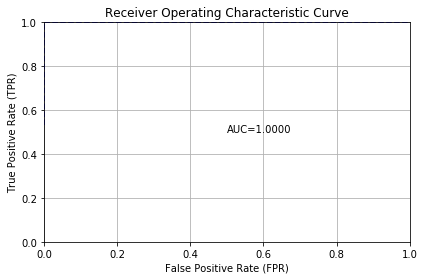

In [8]:
perf = glm_model.model_performance()  #train=True is the default, so it's not needed
perf.plot()

### III Regresion Logistica para Loan usando scikit-learn 

#### A-Using the transformation  OneHot for variable "Status Marital".This is the method recommended by scikit-learn

In [9]:
#A-Usando la codificacion OneHot para la variable Status Marital Esta es la que recomineda scikit-learn
df = pd.read_csv("https://academic.uprm.edu/eacuna/datosarbol.csv")
y=df['Prestamo']
data=df.iloc[:,0:6]
#Codificando 0-1 las Variables Sexo y CasPropia
lb_make = LabelEncoder()
data["Sexo"] = lb_make.fit_transform(data["Sexo"])
data['CasPropia']=lb_make.fit_transform(data["CasPropia"])
data1=data['StatustMarital']
#Aplicando OneHot encoding a la predictora StatustMarital
data2=pd.get_dummies(data1,prefix=['StatustMarital'])
data3=pd.concat([data.iloc[:,0:5],data2],axis=1)
y2=lb_make.fit_transform(y)
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression(solver="newton-cg")
model = model.fit(data3, y2)
print("Coeficientes del modelo", model.coef_)

Coeficientes del modelo [[ 0.029659   -0.30786189  0.12159804  0.14661168  0.00391128  0.92715773
  -1.68462938  0.33328037  0.42418707]]


In [10]:
data3.head()

,Sexo,Familia,CasPropia,AnosEmpleo,Sueldo,['StatustMarital']_Casado,['StatustMarital']_Divorciado,['StatustMarital']_Soltero,['StatustMarital']_Viudo
0,0,3,0,17,2500,0,0,1,0
1,1,5,1,10,3000,1,0,0,0
2,1,4,0,15,2000,0,0,0,1
3,0,3,1,16,2800,0,0,1,0
4,0,6,1,11,4000,0,0,0,1


Notice that the model contains 3 more predictors since the feature "Status Marital" requires four binary attributes. 

In [11]:
# Tasa de precision
model.score(data3, y2)
predictions = model.predict(data3)
print(classification_report(y2, predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.94      1.00      0.97        15

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25



#### B-Using  codificacion with variables dummies for the categorical variables

In [12]:
# B-Usando la codificacion con variables dummies
data4=pd.get_dummies(data1,prefix=['StatustMarital'], drop_first=True)
data5=pd.concat([data.iloc[:,0:5],data4],axis=1)
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression()
model = model.fit(data5, y2)
model.score(data5, y2)
predictions = model.predict(data5)
print("coeficientes del modelo", model.coef_)
print(classification_report(y2, predictions))

coeficientes del modelo [[-2.68931204e-01 -3.27886301e-01  1.16789185e-01  1.15249410e-02
   1.45795103e-03 -1.94386707e+00 -7.49201843e-01 -2.46673250e-02]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.88      1.00      0.94        15

    accuracy                           0.92        25
   macro avg       0.94      0.90      0.91        25
weighted avg       0.93      0.92      0.92        25



#### Using a trivial codification for the variable "Status Marital"

In [13]:
#Usando una codificacion Trivial de Status Marital
data['StatustMarital']=lb_make.fit_transform(data["StatustMarital"])
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression()
model = model.fit(data, y2)
model.score(data, y2)
predictions = model.predict(data)
print("Coeficientes del modelo", model.coef_)
print(classification_report(y2, predictions))

Coeficientes del modelo [[-0.78186659 -0.48378021  0.7527695   0.03836843  0.00138165  0.0058941 ]]
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.72      0.87      0.79        15

    accuracy                           0.72        25
   macro avg       0.72      0.68      0.69        25
weighted avg       0.72      0.72      0.71        25

